In [1]:
from ultralytics import YOLO
import ultralytics  # <--- pour la version
import cv2
import yaml
import os

print("✅ YOLO version:", ultralytics.__version__)


✅ YOLO version: 8.3.160


In [2]:
# Vérifie que ton YAML est OK
with open('data.yaml') as f:
    data = yaml.safe_load(f)

print("✅ YAML contents:", data)


✅ YAML contents: {'train': 'dataset_rebuilt/images/train', 'val': 'dataset_rebuilt/images/val', 'nc': 2, 'names': ['logo', 'cachet']}


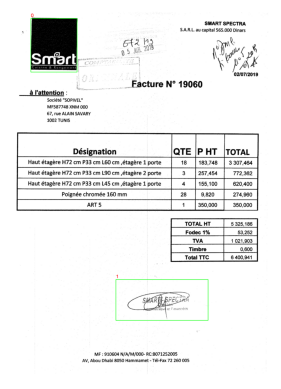

In [3]:
import matplotlib.pyplot as plt

# Exemple de chemin
img_path = "dataset_rebuilt/images/train/facture_00001.png"
label_path = "dataset_rebuilt/labels/train/facture_00001.txt"

# Lire l'image
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, w, _ = img.shape

# Lire le label
with open(label_path) as f:
    lines = f.readlines()

# Dessiner les bbox
for line in lines:
    cls, x, y, bw, bh = map(float, line.strip().split())
    x1 = int((x - bw / 2) * w)
    y1 = int((y - bh / 2) * h)
    x2 = int((x + bw / 2) * w)
    y2 = int((y + bh / 2) * h)

    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(img, str(int(cls)), (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

plt.imshow(img)
plt.axis('off')
plt.show()


In [4]:
from ultralytics import YOLO
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
print("✅ Using device:", device)


✅ Using device: cuda


In [5]:
import torch

print("CUDA available:", torch.cuda.is_available())
print("GPU name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

CUDA available: True
GPU name: NVIDIA GeForce RTX 3050 Ti Laptop GPU


In [6]:
from ultralytics import YOLO

# 📌 Charge le modèle
model = YOLO('yolov8s.pt')  # ou 'yolov8n.pt' si VRAM limite

# 📌 Lancer l'entraînement propre
model.train(
    data='data.yaml',
    epochs=100,
    imgsz=640,
    batch=8,
    device=0,        # GPU
    optimizer='AdamW',
    cos_lr=True,
    patience=30,
    mosaic=1.0,
    hsv_h=0.01,
    hsv_s=0.5,
    hsv_v=0.3,
    degrees=5.0,
    translate=0.05,
    scale=0.3,
    shear=1.0,
    flipud=0.5,
    fliplr=0.5
)


100%|██████████| 21.5M/21.5M [00:14<00:00, 1.56MB/s]


Ultralytics 8.3.160  Python-3.12.9 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=data.yaml, degrees=5.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.5, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.01, hsv_s=0.5, hsv_v=0.3, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train13, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=30, perspective=0.0, plots=True, pose=12.0, pretra

100%|██████████| 5.35M/5.35M [00:02<00:00, 2.04MB/s]


AMP: checks passed 
train: Fast image access  (ping: 0.10.0 ms, read: 515.5174.4 MB/s, size: 1936.7 KB)


train: Scanning C:\Users\pc\Desktop\maessa\dataset_rebuilt\labels\train.cache... 457 images, 0 backgrounds, 0 corrupt: 100%|██████████| 457/457 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.10.0 ms, read: 517.0239.0 MB/s, size: 13950.1 KB)


val: Scanning C:\Users\pc\Desktop\maessa\dataset_rebuilt\labels\val.cache... 115 images, 0 backgrounds, 0 corrupt: 100%|██████████| 115/115 [00:00<?, ?it/s]


Plotting labels to c:\Users\pc\runs\detect\train13\labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to c:\Users\pc\runs\detect\train13
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.98G      2.171      3.352      1.892          1        640: 100%|██████████| 58/58 [00:16<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.58it/s]


                   all        115        180   0.000227     0.0112   0.000139   8.23e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.05G      2.185      2.443      1.892          2        640: 100%|██████████| 58/58 [00:11<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.49it/s]

                   all        115        180    0.00301       0.16    0.00225   0.000612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.97G      2.071      2.337      1.794          3        640: 100%|██████████| 58/58 [00:11<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all        115        180     0.0011      0.258   0.000894   0.000221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.07G      1.975      2.235       1.73          3        640: 100%|██████████| 58/58 [00:27<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.73it/s]

                   all        115        180     0.0257     0.0617     0.0293      0.013



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100       1.9G      1.989      2.153       1.71          3        640: 100%|██████████| 58/58 [00:26<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.74it/s]

                   all        115        180     0.0512      0.159     0.0504     0.0175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100       1.9G      1.916      2.016      1.675          3        640: 100%|██████████| 58/58 [00:12<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.59it/s]

                   all        115        180     0.0569     0.0202     0.0167    0.00521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100       1.9G      1.908      1.993      1.673          4        640: 100%|██████████| 58/58 [00:11<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.69it/s]

                   all        115        180    0.00915     0.0943    0.00348   0.000697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100       1.9G       1.86      1.901      1.609          3        640: 100%|██████████| 58/58 [00:11<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.37it/s]

                   all        115        180      0.116      0.101     0.0683     0.0274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100       1.9G      1.867      1.824      1.623          2        640: 100%|██████████| 58/58 [00:11<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.65it/s]

                   all        115        180     0.0195      0.419     0.0419     0.0144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100       1.9G      1.842      1.844       1.62          3        640: 100%|██████████| 58/58 [00:12<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.63it/s]

                   all        115        180      0.343      0.282      0.271     0.0964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100       1.9G      1.858      1.861       1.63          2        640: 100%|██████████| 58/58 [00:11<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.02it/s]

                   all        115        180      0.327      0.347      0.308      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.08G      1.767      1.818      1.551          4        640: 100%|██████████| 58/58 [00:11<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.99it/s]

                   all        115        180      0.532      0.636      0.597      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.92G      1.738      1.717      1.552          1        640: 100%|██████████| 58/58 [00:11<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.23it/s]

                   all        115        180      0.443      0.414      0.443      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.92G      1.806      1.734        1.6          2        640: 100%|██████████| 58/58 [00:11<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.84it/s]

                   all        115        180      0.503      0.479      0.449      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.92G      1.792      1.674       1.56          4        640: 100%|██████████| 58/58 [00:11<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.08it/s]

                   all        115        180      0.158      0.144     0.0723     0.0272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.98G      1.767      1.725      1.572          0        640: 100%|██████████| 58/58 [00:11<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.87it/s]

                   all        115        180     0.0293       0.25     0.0344     0.0136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100         2G      1.746       1.69      1.551          2        640: 100%|██████████| 58/58 [00:11<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.40it/s]

                   all        115        180      0.267      0.129     0.0813     0.0283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.97G      1.737      1.645      1.542          2        640: 100%|██████████| 58/58 [00:11<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.99it/s]

                   all        115        180      0.517      0.462      0.459      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100         2G      1.787      1.651      1.558          4        640: 100%|██████████| 58/58 [00:11<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.00it/s]

                   all        115        180      0.534      0.563       0.51      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100         2G      1.742      1.742      1.546          1        640: 100%|██████████| 58/58 [00:11<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.00it/s]

                   all        115        180       0.62      0.618      0.612      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.07G      1.698      1.629      1.516          4        640: 100%|██████████| 58/58 [00:11<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.34it/s]

                   all        115        180      0.726      0.519      0.639      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.97G      1.709      1.573      1.524          1        640: 100%|██████████| 58/58 [00:11<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.37it/s]

                   all        115        180      0.576     0.0758     0.0834     0.0246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.97G      1.722      1.595       1.54          4        640: 100%|██████████| 58/58 [00:11<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.30it/s]

                   all        115        180     0.0177      0.199     0.0422     0.0139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.97G      1.734      1.493      1.531          3        640: 100%|██████████| 58/58 [00:11<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.00it/s]

                   all        115        180     0.0646      0.293     0.0915     0.0376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      1.97G       1.72       1.55      1.525          2        640: 100%|██████████| 58/58 [00:11<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.22it/s]

                   all        115        180      0.606       0.58      0.584      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      1.97G      1.713      1.621      1.537          2        640: 100%|██████████| 58/58 [00:11<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.67it/s]

                   all        115        180      0.483      0.395       0.41      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.97G      1.665      1.482      1.495          4        640: 100%|██████████| 58/58 [00:11<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.90it/s]

                   all        115        180      0.671      0.711      0.706      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      1.99G      1.633      1.455      1.478          3        640: 100%|██████████| 58/58 [00:11<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.92it/s]

                   all        115        180      0.639      0.611      0.686      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.08G      1.623      1.478      1.452          2        640: 100%|██████████| 58/58 [00:11<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.81it/s]

                   all        115        180      0.677      0.665      0.705      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      1.96G      1.617      1.417      1.436          4        640: 100%|██████████| 58/58 [00:11<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.11it/s]

                   all        115        180      0.593      0.639       0.63      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.08G      1.677      1.473      1.487          2        640: 100%|██████████| 58/58 [00:11<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.04it/s]

                   all        115        180      0.632      0.557       0.57      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100         2G      1.716       1.45      1.519          1        640: 100%|██████████| 58/58 [00:11<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.22it/s]

                   all        115        180      0.576      0.472      0.533      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100         2G      1.678      1.488      1.464          2        640: 100%|██████████| 58/58 [00:12<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.10it/s]

                   all        115        180       0.68      0.575      0.638      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100         2G      1.668      1.497      1.487          2        640: 100%|██████████| 58/58 [00:11<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.99it/s]

                   all        115        180      0.673      0.595      0.657      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100         2G      1.587      1.446      1.451          3        640: 100%|██████████| 58/58 [00:11<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.26it/s]

                   all        115        180      0.644      0.721      0.722      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100         2G      1.632      1.362      1.464          4        640: 100%|██████████| 58/58 [00:11<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.86it/s]

                   all        115        180      0.604      0.654      0.642      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100         2G      1.649      1.388      1.454          2        640: 100%|██████████| 58/58 [00:11<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.40it/s]

                   all        115        180      0.488      0.402      0.393      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100         2G      1.642      1.472      1.481          1        640: 100%|██████████| 58/58 [00:11<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.73it/s]

                   all        115        180      0.689      0.588       0.68      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100         2G      1.612      1.389      1.438          4        640: 100%|██████████| 58/58 [00:11<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.27it/s]

                   all        115        180      0.629      0.681      0.715      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100         2G      1.597       1.34      1.442          2        640: 100%|██████████| 58/58 [00:11<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.39it/s]

                   all        115        180      0.127      0.347      0.191     0.0623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      1.92G      1.565      1.323      1.426          2        640: 100%|██████████| 58/58 [00:11<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.03it/s]

                   all        115        180      0.689      0.624      0.669      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      1.92G       1.55      1.318      1.412          2        640: 100%|██████████| 58/58 [00:11<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.03it/s]

                   all        115        180      0.569      0.625      0.603      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      1.92G      1.613      1.433      1.434          1        640: 100%|██████████| 58/58 [00:11<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.26it/s]

                   all        115        180      0.713       0.43      0.508      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      1.92G      1.615      1.393      1.464          6        640: 100%|██████████| 58/58 [00:11<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.28it/s]

                   all        115        180      0.603      0.476       0.55      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      1.92G      1.573      1.349      1.432          4        640: 100%|██████████| 58/58 [00:11<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.05it/s]

                   all        115        180      0.677      0.581      0.661       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      1.92G      1.568      1.337      1.431          3        640: 100%|██████████| 58/58 [00:11<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.43it/s]

                   all        115        180      0.661      0.661      0.712      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      1.92G      1.532      1.333      1.401          0        640: 100%|██████████| 58/58 [00:11<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.13it/s]

                   all        115        180      0.504      0.178      0.198     0.0816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100         2G      1.566      1.285       1.41          3        640: 100%|██████████| 58/58 [00:11<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.13it/s]

                   all        115        180      0.732      0.586      0.701       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.07G      1.565      1.309      1.414          2        640: 100%|██████████| 58/58 [00:11<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.16it/s]

                   all        115        180      0.723      0.698      0.744      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      1.97G      1.552      1.305      1.424          4        640: 100%|██████████| 58/58 [00:11<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.04it/s]

                   all        115        180      0.474      0.228       0.26      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100         2G      1.539      1.275      1.396          3        640: 100%|██████████| 58/58 [00:11<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.31it/s]

                   all        115        180      0.661      0.752      0.752      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      1.92G      1.565      1.272      1.431          2        640: 100%|██████████| 58/58 [00:11<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.22it/s]

                   all        115        180      0.635      0.736      0.731      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      1.98G      1.545      1.227      1.405          2        640: 100%|██████████| 58/58 [00:11<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.00it/s]

                   all        115        180      0.421      0.209      0.183     0.0841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.05G      1.553      1.291      1.405          1        640: 100%|██████████| 58/58 [00:11<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.24it/s]

                   all        115        180      0.706      0.741      0.738      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100         2G      1.567      1.272      1.418          4        640: 100%|██████████| 58/58 [00:11<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.31it/s]

                   all        115        180      0.758      0.664      0.737      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100         2G      1.485      1.171      1.359          3        640: 100%|██████████| 58/58 [00:11<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.98it/s]

                   all        115        180      0.697      0.716      0.733      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      1.99G      1.501      1.169      1.345          2        640: 100%|██████████| 58/58 [00:11<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.06it/s]

                   all        115        180      0.675      0.722      0.733      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      1.98G      1.504       1.23      1.382          2        640: 100%|██████████| 58/58 [00:11<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.86it/s]

                   all        115        180      0.714      0.683      0.736       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      1.98G      1.558      1.242      1.429          2        640: 100%|██████████| 58/58 [00:11<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.10it/s]

                   all        115        180       0.61      0.553      0.578      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100         2G      1.473      1.206      1.379          2        640: 100%|██████████| 58/58 [00:11<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.26it/s]

                   all        115        180       0.42      0.226       0.23      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      1.92G      1.499      1.175      1.371          1        640: 100%|██████████| 58/58 [00:11<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.18it/s]

                   all        115        180      0.641      0.691      0.696      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      1.92G      1.452      1.129      1.349          2        640: 100%|██████████| 58/58 [00:11<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.74it/s]

                   all        115        180      0.646      0.603      0.638       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100         2G       1.53      1.166      1.391          3        640: 100%|██████████| 58/58 [00:11<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.95it/s]

                   all        115        180      0.686      0.691      0.699      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      1.92G      1.488      1.117       1.35          2        640: 100%|██████████| 58/58 [00:11<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.18it/s]

                   all        115        180      0.734      0.631      0.735      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.08G      1.451      1.147      1.343          4        640: 100%|██████████| 58/58 [00:11<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.17it/s]

                   all        115        180      0.746      0.664      0.768      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      1.97G       1.44      1.108      1.346          3        640: 100%|██████████| 58/58 [00:12<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.63it/s]

                   all        115        180      0.689      0.619      0.657      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.08G      1.439      1.134       1.34          1        640: 100%|██████████| 58/58 [00:11<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.56it/s]

                   all        115        180      0.746      0.698       0.74      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      1.92G      1.441      1.126      1.344          2        640: 100%|██████████| 58/58 [00:11<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.55it/s]

                   all        115        180      0.737      0.742      0.764      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      1.92G      1.413      1.104      1.345          2        640: 100%|██████████| 58/58 [00:11<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.05it/s]

                   all        115        180      0.771      0.712       0.77      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      1.92G       1.45       1.09      1.335          2        640: 100%|██████████| 58/58 [00:11<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.47it/s]

                   all        115        180      0.768      0.719       0.79      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      1.92G      1.424      1.084      1.336          3        640: 100%|██████████| 58/58 [00:11<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.64it/s]

                   all        115        180      0.782      0.709      0.774      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      1.92G      1.472      1.101      1.334          5        640: 100%|██████████| 58/58 [00:11<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.14it/s]

                   all        115        180      0.711      0.758      0.784      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      1.92G      1.425      1.074      1.327          1        640: 100%|██████████| 58/58 [00:11<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.92it/s]

                   all        115        180      0.694      0.568      0.652       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      1.92G      1.407      1.049      1.321          1        640: 100%|██████████| 58/58 [00:11<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.82it/s]

                   all        115        180      0.733      0.729      0.763      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      1.92G      1.412      1.069      1.311          3        640: 100%|██████████| 58/58 [00:11<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.33it/s]

                   all        115        180      0.741      0.739      0.782       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      1.92G      1.444      1.075       1.34          2        640: 100%|██████████| 58/58 [00:11<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.66it/s]

                   all        115        180      0.742      0.716      0.763      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      1.92G        1.4      1.049      1.319          4        640: 100%|██████████| 58/58 [00:11<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.39it/s]

                   all        115        180      0.729      0.768      0.775      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      1.92G      1.396       1.06       1.31          2        640: 100%|██████████| 58/58 [00:12<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.70it/s]

                   all        115        180      0.715      0.767      0.783      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      1.92G      1.395      1.048      1.288          0        640: 100%|██████████| 58/58 [00:11<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.10it/s]

                   all        115        180      0.703      0.727      0.759      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      1.92G      1.404      1.028      1.327          5        640: 100%|██████████| 58/58 [00:11<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.75it/s]

                   all        115        180      0.732      0.776      0.784      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      1.92G      1.419      1.015      1.307          5        640: 100%|██████████| 58/58 [00:11<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.17it/s]

                   all        115        180      0.777      0.781      0.801      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      1.92G      1.358      1.039       1.26          0        640: 100%|██████████| 58/58 [00:11<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.32it/s]

                   all        115        180      0.752      0.751      0.775      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      1.92G      1.386      1.008      1.302          1        640: 100%|██████████| 58/58 [00:11<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.07it/s]

                   all        115        180      0.783      0.735      0.781      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      1.92G      1.399     0.9597      1.314          4        640: 100%|██████████| 58/58 [00:11<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.42it/s]

                   all        115        180      0.787      0.749      0.789      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      1.99G      1.405      1.032      1.302          1        640: 100%|██████████| 58/58 [00:11<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.38it/s]

                   all        115        180      0.777      0.756      0.788      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.05G      1.367     0.9524      1.295          3        640: 100%|██████████| 58/58 [00:11<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.26it/s]

                   all        115        180      0.734      0.769      0.791       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      1.99G      1.347     0.9912      1.276          4        640: 100%|██████████| 58/58 [00:11<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.01it/s]

                   all        115        180      0.759      0.767      0.795      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.08G      1.377      1.007      1.294          2        640: 100%|██████████| 58/58 [00:11<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.11it/s]

                   all        115        180      0.755      0.768      0.793      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      1.92G      1.345     0.9746      1.289          2        640: 100%|██████████| 58/58 [00:11<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.40it/s]

                   all        115        180      0.785      0.761      0.797      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      1.92G      1.344     0.9478      1.269          1        640: 100%|██████████| 58/58 [00:11<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.14it/s]

                   all        115        180      0.793      0.751      0.789      0.443


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.07G      1.293     0.9612      1.274          1        640: 100%|██████████| 58/58 [00:12<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.12it/s]

                   all        115        180      0.728      0.749       0.78      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100       1.9G       1.32     0.9326      1.284          2        640: 100%|██████████| 58/58 [00:11<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.64it/s]

                   all        115        180      0.751      0.763      0.779      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100       1.9G      1.316     0.8862      1.299          1        640: 100%|██████████| 58/58 [00:11<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.93it/s]

                   all        115        180      0.749      0.752      0.781      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100       1.9G      1.308     0.8981      1.288          2        640: 100%|██████████| 58/58 [00:11<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.44it/s]

                   all        115        180      0.755      0.765      0.789      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.08G      1.315     0.8979      1.275          3        640: 100%|██████████| 58/58 [00:11<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.99it/s]

                   all        115        180      0.752      0.761       0.79      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      1.99G      1.293     0.8631       1.28          3        640: 100%|██████████| 58/58 [00:11<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.98it/s]

                   all        115        180      0.752      0.739      0.785      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.08G      1.276     0.9058      1.261          2        640: 100%|██████████| 58/58 [00:11<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.35it/s]

                   all        115        180      0.742      0.744      0.786      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100       1.9G      1.274     0.9048       1.27          1        640: 100%|██████████| 58/58 [00:11<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.10it/s]

                   all        115        180      0.762      0.726      0.788      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.07G      1.289     0.8538      1.264          2        640: 100%|██████████| 58/58 [00:11<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.08it/s]

                   all        115        180      0.732      0.765       0.79      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      1.92G      1.296     0.9102      1.262          1        640: 100%|██████████| 58/58 [00:11<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.35it/s]

                   all        115        180      0.727      0.776      0.787      0.439



100 epochs completed in 0.402 hours.
Optimizer stripped from c:\Users\pc\runs\detect\train13\weights\last.pt, 22.5MB
Optimizer stripped from c:\Users\pc\runs\detect\train13\weights\best.pt, 22.5MB

Validating c:\Users\pc\runs\detect\train13\weights\best.pt...
Ultralytics 8.3.160  Python-3.12.9 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.85it/s]


                   all        115        180      0.777      0.756      0.788      0.454
                  logo         93         99      0.868      0.727       0.83      0.496
                cachet         76         81      0.687      0.785      0.746      0.412
Speed: 0.3ms preprocess, 5.0ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to c:\Users\pc\runs\detect\train13


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002753C0C6060>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0

In [1]:
from ultralytics import YOLO

# Charge le modèle entraîné
model = YOLO('best.pt')  # mets bien le chemin réel
print("✅ Modèle chargé :", model)


✅ Modèle chargé : YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=Tru

In [2]:
results = model.predict(
    source='dataset_rebuilt/images/test/images',  # ou ton dossier test spécifique
    conf=0.3,               # seuil de confiance, ajuste au besoin
    save=True,              # sauvegarde images avec bboxes dessinées
    save_txt=True           # sauvegarde prédictions .txt au format YOLO
)

print("✅ Prédictions terminées.")


image 1/113 c:\Users\pc\Desktop\maessa\dataset_rebuilt\images\test\images\facture_00999.png: 640x480 1 logo, 2 cachets, 64.2ms
image 2/113 c:\Users\pc\Desktop\maessa\dataset_rebuilt\images\test\images\facture_01000.png: 640x480 1 logo, 11.3ms
image 3/113 c:\Users\pc\Desktop\maessa\dataset_rebuilt\images\test\images\facture_01001.png: 640x480 1 logo, 1 cachet, 8.7ms
image 4/113 c:\Users\pc\Desktop\maessa\dataset_rebuilt\images\test\images\facture_01002.png: 640x480 (no detections), 8.7ms
image 5/113 c:\Users\pc\Desktop\maessa\dataset_rebuilt\images\test\images\facture_01003.png: 640x480 2 logos, 1 cachet, 8.8ms
image 6/113 c:\Users\pc\Desktop\maessa\dataset_rebuilt\images\test\images\facture_01004.png: 640x480 1 cachet, 8.3ms
image 7/113 c:\Users\pc\Desktop\maessa\dataset_rebuilt\images\test\images\facture_01005.png: 640x480 1 cachet, 8.7ms
image 8/113 c:\Users\pc\Desktop\maessa\dataset_rebuilt\images\test\images\facture_01006.png: 640x480 2 logos, 1 cachet, 9.3ms
image 9/113 c:\Users\

In [5]:
from ultralytics import YOLO

model = YOLO('best.pt')

results = model.val(data='data.yaml', split='test')

Ultralytics 8.3.160  Python-3.12.9 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access  (ping: 0.10.1 ms, read: 100.234.6 MB/s, size: 1521.9 KB)


val: Scanning C:\Users\pc\Desktop\maessa\dataset_rebuilt\test\labels... 113 images, 8 backgrounds, 0 corrupt: 100%|██████████| 113/113 [00:00<00:00, 212.27it/s]


val: New cache created: C:\Users\pc\Desktop\maessa\dataset_rebuilt\test\labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.13it/s]


                   all        113        191      0.808      0.739      0.774      0.437
                  logo         77         86      0.773      0.698      0.747      0.458
                cachet         97        105      0.843      0.781      0.801      0.417
Speed: 2.7ms preprocess, 9.0ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to c:\Users\pc\runs\detect\val2
